In [39]:
import tensorflow_datasets as tfds


In [40]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard

In [41]:
# Load the Cats vs. Dogs dataset
(train_data, test_data), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

In [42]:
# preprocess and normalizing the image

def preprocess_image (image,label):
  image = tf.image.resize(image,(128,128))
  image = tf.cast(image,tf.float32)/255.0
  return image, label



In [43]:
train_data = train_data.map(preprocess_image)
test_data = test_data.map(preprocess_image)

In [48]:
# Task 2: Model Architecture


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='softmax'))


In [49]:
# Task 3: Model Compilation and Training

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data.batch(64), epochs=2, validation_data=test_data.batch(64))

Epoch 1/2
291/291 [==============================] - 568s 2s/step - loss: 0.6318 - accuracy: 0.4961 - val_loss: 0.5389 - val_accuracy: 0.5099
Epoch 2/2
291/291 [==============================] - 536s 2s/step - loss: 0.5205 - accuracy: 0.4961 - val_loss: 0.4874 - val_accuracy: 0.5099


In [51]:
# Task 4: Model Evaluation

test_loss, test_accuracy = model.evaluate(test_data.batch(64))
print(f'Test Accuracy: {test_accuracy}')

73/73 [==============================] - 40s 543ms/step - loss: 0.4874 - accuracy: 0.5099
Test Accuracy: 0.509888231754303


In [52]:
# Task 5: Prediction Function

def predict_cat_or_dog(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0, 0] > 0.5:
        label = 'Dog'
    else:
        label = 'Cat'

    plt.imshow(img)
    plt.title(f'Prediction: {label}')
    plt.show()

In [53]:
# Task 6: Training History Plotting

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


1/1 [==============================] - 0s 127ms/step


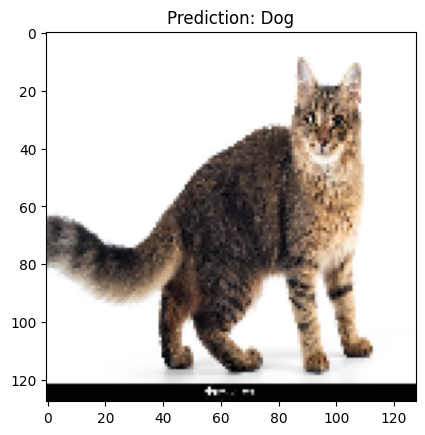

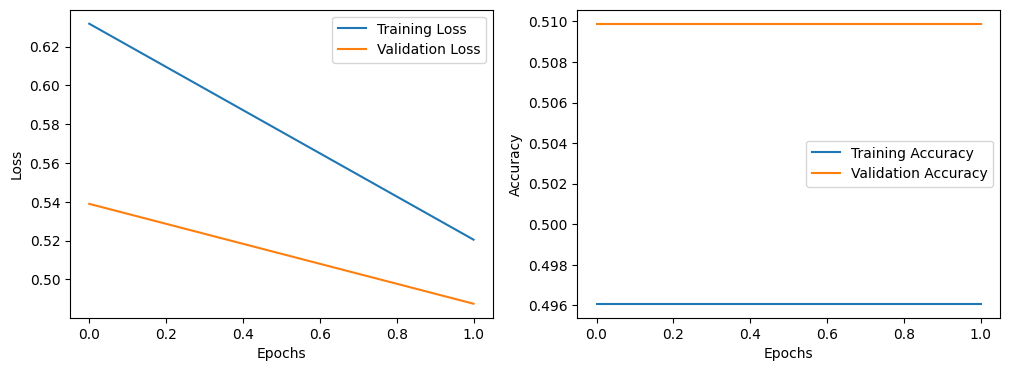

In [54]:
# Task 7: Example Usage

example_image_path = '/content/sample_data/cat.jpg'
predict_cat_or_dog(example_image_path)

# Task 8: Training History Plotting
plot_training_history(history)

# New Section